## Resources
https://stackoverflow.com/questions/8863810/python-find-similar-colors-best-way <br>
https://lodev.org/cgtutor/floodfill.html <br>
https://en.wikipedia.org/wiki/Flood_fill#Span_Filling

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def floodfill_scanline(image:list, y:float, x:float, new_color:list, old_color:list, tolerance:float):
    """[Flood fill using recursive scanline method]

    Args:
        image (list): [Image data in Numpy array]
        y (float): [Y-Coordinate of the starting point]
        x (float): [X-Coordinate of the starting point]
        new_color (list): [Color of the new color in RGB format]
        old_color (list): [Color of the old color in RGB format]
        tolerance (float): [Level of tolerance between 0-3; 0 being the same color]
    """
    if (np.array_equal(image[y,x],new_color)):
        return
    if (old_color is None):
        old_color = image[y,x].copy()
    if (y < 0):
        return

    # Draw from origin to the right
    x1 = x
    while ((not np.array_equal(image[y,x1],new_color)) and (color_distance(old_color[0:3],image[y,x1][0:3]) <= tolerance)):
        image[y][x1] = new_color
        x1 += 1
        if (x1 == image.shape[0]):
            break

    # Draw from origin to the left
    x1 = x-1
    while ((x1 >= 0) and (color_distance(old_color[0:3],image[y,x1][0:3]) <= tolerance)):
        if ((not np.array_equal(image[y,x1-1],new_color) or (x1 == 0))):
            image[y][x1] = new_color
            x1 -= 1
    
    # Check above recursively
    x1 = x
    while((x1 < image.shape[0]) and np.array_equal(image[y,x1],new_color)):
        if((y >= 0) and (color_distance(old_color[0:3],image[y-1,x1][0:3]) <= tolerance)):
            floodfill_scanline(image, y-1, x1, new_color, old_color, tolerance)
        x1 += 1
    x1 = x - 1
    while((x1 >= 0) and np.array_equal(image[y,x1],new_color)):
        if((y >= 0) and (color_distance(old_color[0:3],image[y-1,x1][0:3]) <= tolerance)):
            floodfill_scanline(image, y-1, x1, new_color, old_color, tolerance)
        x1 -= 1
    
    # Check below recursively
    x1 = x
    while((x1 < image.shape[0]) and np.array_equal(image[y,x1],new_color)):
        if((y < image.shape[1]-1) and (color_distance(old_color[0:3],image[y+1,x1][0:3]) <= tolerance)):
            floodfill_scanline(image, y+1, x1, new_color, old_color, tolerance)
        x1 += 1
    x1 = x - 1
    while((x1 >= 0) and np.array_equal(image[y,x1],new_color)):
        if((y < image.shape[1]-1) and (color_distance(old_color[0:3],image[y+1,x1][0:3]) <= tolerance)):
            floodfill_scanline(image, y+1, x1, new_color, old_color, tolerance)
        x1 -= 1

In [4]:
def color_distance(rgb1:list,rgb2:list):
    """[Calculate color(rgb) distance between 2 colors return value between 0-3, where 0 being the same color]

    Args:
        rgb1 (list): [RGB color]
        rgb2 (list): [RGB color]

    Returns:
        [type]: [description]
        
    Credits:  ["Developer"] https://stackoverflow.com/questions/8863810/python-find-similar-colors-best-way
    """

    rm = 0.5*(rgb1[0]+rgb2[0])
    d = sum((2+rm,4,3-rm)*(rgb1-rgb2)**2)**0.5
    return d

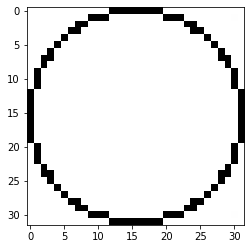

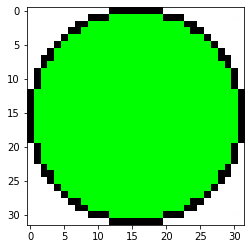

In [5]:
circle1 = plt.imread('small_circle.png')
plt.imshow(circle1)
plt.figure()

floodfill_scanline(circle1, 15, 15, np.array([0,1,0,1]).astype('float32'), None, 0)
plt.imshow(circle1)

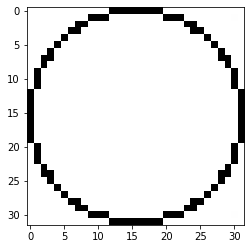

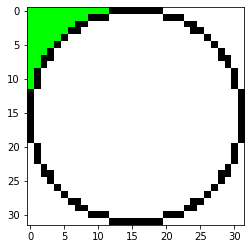

In [13]:
circle2 = plt.imread('small_circle.png')
plt.imshow(circle2)
plt.figure()

floodfill_scanline(circle2, 0, 0, np.array([0,1,0,1]).astype('float32'), None, 0)
plt.imshow(circle2)

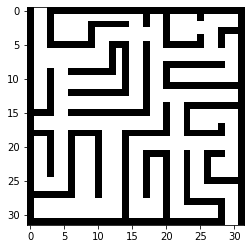

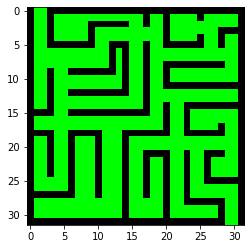

In [20]:
maze = plt.imread('maze.png')
plt.imshow(maze)
plt.figure()

floodfill_scanline(maze, 0, 1, np.array([0,1,0,1]).astype('float32'), None, 0)

plt.imshow(maze)

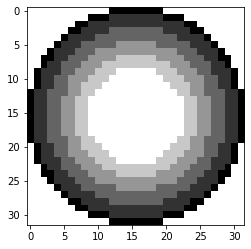

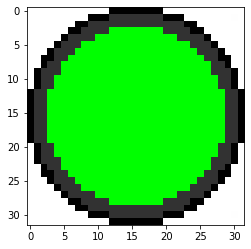

In [23]:
gradient1 = plt.imread('small_circle_gradient.png')
plt.imshow(gradient1)
plt.figure()

floodfill_scanline(gradient1, 15, 15, np.array([0,1,0,1]).astype('float32'), None, 2)

plt.imshow(gradient1)

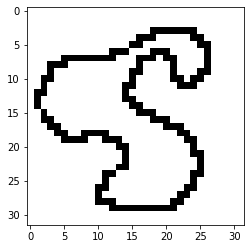

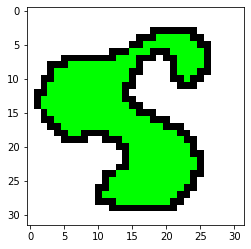

In [9]:
random_shape1 = plt.imread('random_shape.png')
plt.imshow(random_shape1)
plt.figure()

floodfill_scanline(random_shape1, 15, 15, np.array([0,1,0,1]).astype('float32'), None, 1.5)

plt.imshow(random_shape1)